In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
class KMeans:

    def __init__(self, pts=False, k=1, step_dist=0.001, max_iter=200, make_plot=True):    
        if not pts:
            pts = np.random.randn(10, 2)

        self.k = k
        self.pts = pts
        self.step_dist = step_dist
        self.max_iter = max_iter
        self.make_plot = make_plot
        self.n = len(self.pts[0])
        self.k_centers = []
        for _ in range(self.k): self.k_centers.append(np.random.randn(self.n))
        self.closest_centroid_index_for_pts = []

    def l2_norm(self, pt1, pt2):
        n1 = len(pt1)
        n2 = len(pt2)
        if n1 == n2:
            total_dist = 0
            for i in range(n1):
                total_dist += (pt1[i] - pt2[i])**2      
            return total_dist**0.5
        else: print(f'Point size mismatch: {n1} != {n2}')

    def calc_centers(self, update=True):
        # current closest center for each point
        this_closest_centroid_index_for_pts = []
        for pt in self.pts:
            dists = []
            for kcenter in self.k_centers:
                dist = self.l2_norm(pt, kcenter)
                dists.append(dist)
            this_closest_centroid_index_for_pts.append(np.argmin(dist))

        if update:
            self.closest_centroid_index_for_pts = this_closest_centroid_index_for_pts

    def step(self):
        # get mean center of every pts in each cluster
        mean_centers_for_each_cluster = []
        for ki in range(self.k):
            pts_in_k = []
            for idx, pt in enumerate(self.pts):
                if ki == self.closest_centroid_index_for_pts[idx]:
                    pts_in_k.append(self.pts)

            ki_center = np.average(pts_in_k, axis=0)
            print(f'{ki}: {ki_center}')
            mean_centers_for_each_cluster.append(ki_center)

        # move each cluster center towards that by self.step_dist
        for idx, k_center in enumerate(self.k_centers):
            mean_center_at_k = mean_centers_for_each_cluster[idx]
            if len(k_center) == len(mean_center_at_k[0]):
                for dim in range(len(k_center)):
                    if k_center[dim] > mean_center_at_k[dim]: k_center[dim] -= self.step_dist
                    else: k_center[dim] += self.step_dist

            else: print(f'something\'s up with step function: size mismatch')


    def plot(self):
        pass

    def train(self):
        self.calc_centers()
        i = self.max_iter
        while i > 0:
            self.step()
            if self.make_plot and i%10: self.plot()
            i-=1

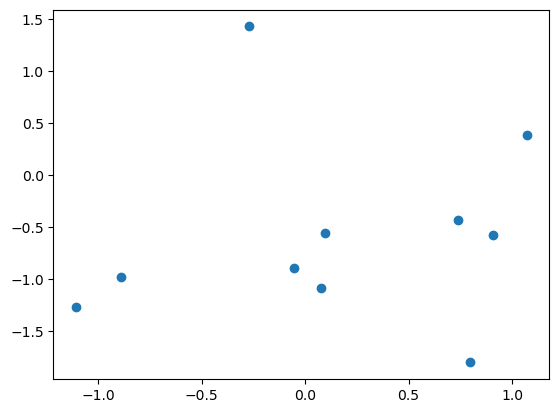

In [89]:
model = KMeans(k=2)
xs = model.pts[:, 0]
ys = model.pts[:, 1]

plt.scatter(xs, ys)

In [90]:
model.train()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [91]:
for x in model.k_centers:
    print(x)
print()
for y in model.pts:
    print(y)

[ 1.92230393 -1.77403839]
[ 0.22473507 -0.14666309]

[-0.27012351  1.43031814]
[ 0.09655759 -0.55206172]
[ 0.73583119 -0.43521487]
[ 0.07754613 -1.08240867]
[-0.88803951 -0.98435122]
[-0.05576861 -0.89656642]
[ 0.79359714 -1.80262883]
[1.07080349 0.38270423]
[ 0.90512567 -0.57888751]
[-1.10592206 -1.26653281]


In [94]:
np.average(y, axis=0)

-1.1862274328372329

In [96]:
np.average(model.pts, axis=0)

array([ 0.13596075, -0.57856297])

C:\Users\chinm\AppData\Local\Temp\ipykernel_19744\3682269968.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(center[0], center[1], cmap='green')


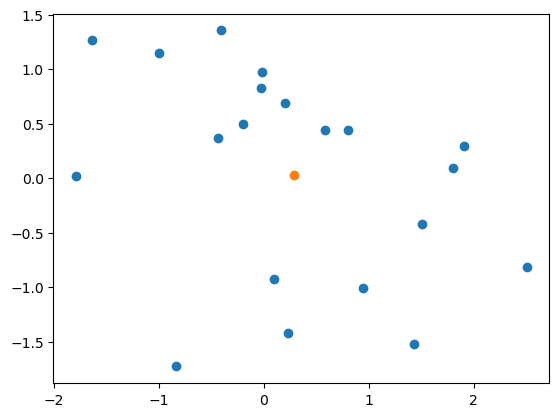

In [42]:
pts = np.random.randn(20, 2)
xs = pts[:, 0]
ys = pts[:, 1]
center = np.average(pts, axis=0)
plt.scatter(xs, ys)
plt.scatter(center[0], center[1], cmap='green')